# Education

In this assessment, you'll apply `pandas` and `seaborn` to process and visualize education statistics.

The [National Center for Education Statistics](https://nces.ed.gov/) is a U.S. federal government agency for collecting and analyzing data related to education. We have downloaded and cleaned one of their datasets: *[Percentage of persons 25 to 29 years old with selected levels of educational attainment, by race/ethnicity and sex: Selected years, 1920 through 2018](https://nces.ed.gov/programs/digest/d18/tables/dt18_104.20.asp)*.

In [2]:
# For testing purposes
from matplotlib.patches import Rectangle
from pandas.testing import assert_series_equal

import pandas as pd
import seaborn as sns

sns.set_theme()

The `nces_ed_attainment.csv` file has the columns `Year`, `Sex`, `Min degree`, and percentages for each subdivision of 25 to 29 year-olds in the specified year, sex, and min degree. The data is represented as a `pandas` `DataFrame` with the following `MultiIndex` and columns.

- `Year` is the first level of the `MultiIndex` with values ranging from 1920 to 2018.
- `Sex` is the second level of the `MultiIndex` with values `F` for female, `M` for male, or `A` for all students.
- `Min degree` is the third level of the `MultiIndex` with values referring to the minimum degree of educational attainment: `high school`, `associate's`, `bachelor's`, or `master's`.
- `Total` is the overall percentage of the given `Sex` population in the `Year` with at least the `Min degree` of educational attainment.
- `White`, `Black`, `Hispanic`, `Asian`, `Pacific Islander`, `American Indian/Alaska Native`, and `Two or more races` is the percentage of students of the specified racial category (and of the `Sex` in the `Year`) with at least the `Min degree` of educational attainment.

Missing data is denoted `NaN` (not a number).

In [4]:
data = pd.read_csv(
    "nces_ed_attainment.csv",
    na_values=["---"],
    index_col=["Year", "Sex", "Min degree"]
).sort_index(level="Year", sort_remaining=False)
data

Total  White  Black  Hispanic  Asian  Pacific Islander  \
Year Sex Min degree                                                            
1920 A   high school    NaN   22.0    6.3       NaN    NaN               NaN   
         bachelor's     NaN    4.5    1.2       NaN    NaN               NaN   
1940 A   high school   38.1   41.2   12.3       NaN    NaN               NaN   
         bachelor's     5.9    6.4    1.6       NaN    NaN               NaN   
1950 A   high school   52.8   56.3   23.6       NaN    NaN               NaN   
...                     ...    ...    ...       ...    ...               ...   
2018 M   master's       7.3    7.7    2.8       3.1   28.6               NaN   
     F   high school   94.0   96.3   93.2      87.2   97.4              91.8   
         associate's   51.5   59.6   35.8      34.2   76.9              23.6   
         bachelor's    40.8   48.4   26.2      23.2   71.5              13.5   
         master's      10.7   12.6    6.2       3.8   29.9               NaN   

                      American Indian/Alaska Native  Two or more races  
Year Sex Min degree                                                     
1920 A   high school                            NaN                NaN  
         bachelor's                             NaN                NaN  
1940 A   high school                            NaN                NaN  
         bachelor's                             NaN                NaN  
1950 A   high school                            NaN                NaN  
...                                             ...                ...  
2018 M   master's                               NaN                NaN  
     F   high school                           95.1               93.8  
         associate's                           32.8               48.2  
         bachelor's                            22.5               28.7  
         master's                               NaN                NaN  

[214 rows x 8 columns]

The cell above reads `nces_ed_attainment.csv` and replaces all occurrences of the `str` `---` with `pandas` `NaN` to help with later data processing steps. By defining a `MultiIndex` on the columns `Year`, `Sex`, and `Min degree`, we can answer questions like "What is the overall percentage of all 25 to 29 year-olds in the year 2018 who have at least a high school degree?" with the following `df.loc[index, columns]` expression.

In [5]:
data.loc[(2018, "A", "high school"), "Total"]

92.9

For this assessment, instead of writing test cases, we'll only be working with the educational attainment dataset described above. We've provided one test case for each function that includes the exact expected values for each function. Instead of extending the test cases, you'll be asked to write-up and reason about the quality of work demonstrated in each task.

## Collaboration and Conduct

Students are expected to follow Washington state law on the [Student Conduct Code for the University of Washington](https://www.washington.edu/admin/rules/policies/WAC/478-121TOC.html). In this course, students must:

- Indicate on your submission any assistance received, including materials distributed in this course.
- Not receive, generate, or otherwise acquire any substantial portion or walkthrough to an assessment.
- Not aid, assist, attempt, or tolerate prohibited academic conduct in others.

Update the following code cell to include your name and list your sources. If you used any kind of computer technology to help prepare your assessment submission, include the queries and/or prompts. Submitted work that is not consistent with sources may be subject to the student conduct process.

In [6]:
your_name = "Joe"
sources = [
    "Lecture notes from the course",
    "NCES data: https://nces.ed.gov/"
]

assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 2, "must include at least 2 sources, inclusive of lectures and sections"

## Task: Compare bachelor's in a given year

Write a function `compare_bachelors_year` that takes the educational attainment `data` and a year and returns a two-row `Series` that indicates the percentages of M/F 25 to 29 year-olds who achieved at least a bachelor's degree in the given year.

In [7]:
def compare_bachelors_year(data, year):
     # Retrieve bachelor's degree percentages for males and females in the given year
    male_bachelors = data.loc[(year, 'M', "bachelor's"), "Total"]
    female_bachelors = data.loc[(year, 'F', "bachelor's"), "Total"]

    # Create a Series with male and female bachelor's degree percentages
    result = pd.Series([male_bachelors, female_bachelors],
                       name="Total",
                       index=pd.MultiIndex.from_product([[year], ["M", "F"], ["bachelor's"]],
                                                         names=data.index.names))
    return result

output = compare_bachelors_year(data, 1980)
display(output)
assert_series_equal(output, pd.Series([24., 21.], name="Total",
    index=pd.MultiIndex.from_product([[1980], ["M", "F"], ["bachelor's"]], names=data.index.names)
))

Year  Sex  Min degree
1980  M    bachelor's    24.0
      F    bachelor's    21.0
Name: Total, dtype: float64

## Task: Mean min degree between given years for a given category

Write a function `mean_min_degrees` that takes the educational attainment `data`, a `start_year` (default `None`), an `end_year` (default `None`), a string `category` (default `"Total"`) and returns a `Series` indicating, for each `Min degree` within the given years, the average percentage of educational attainment for people of the given `category` between the `start_year` and the `end_year` for the sex `A`. When `start_year` or `end_year` is `None`, consider all rows from either the beginning or end of the dataset (respectively).

In [8]:
def mean_min_degrees(data, start_year=None, end_year=None, category="Total"):
    # Filter data based on start_year and end_year
    if start_year is not None and end_year is not None:
        filtered_data = data.loc[start_year:end_year]
    elif start_year is not None:
        filtered_data = data.loc[start_year:]
    elif end_year is not None:
        filtered_data = data.loc[:end_year]
    else:
        filtered_data = data

    # Filter data based on category and sex A
    filtered_data = filtered_data.loc[(slice(None), 'A', slice(None)), category]

    # Calculate the mean for each Min degree
    mean_degrees = filtered_data.groupby('Min degree').mean()

    return mean_degrees


output = mean_min_degrees(data, start_year=2000, end_year=2009)
display(output)
assert_series_equal(output, pd.Series([38.366667, 29.55, 87.35, 6.466667], name="Total",
    index=pd.Index(["associate's", "bachelor's", "high school", "master's"], name="Min degree")
))

Min degree
associate's    38.366667
bachelor's     29.550000
high school    87.350000
master's        6.466667
Name: Total, dtype: float64

## Writeup: Debugging `NaN` values

While writing test cases, one of your coworkers noticed that some calls to `mean_min_degrees` produce `NaN` values and wanted your opinion on whether or not this is a bug with the function. **[Using the data source](https://nces.ed.gov/programs/digest/d18/tables/dt18_104.20.asp), explain why a `NaN` value appears in the result of the following code cell.**

NaN values can appear in the result of the mean_min_degrees function when there are missing values (NaNs) in the original dataset. These missing values can arise due to various reasons such as incomplete data, errors in data collection, or unavailable information for certain years, sexes, or categories.

In the provided data source, missing values are represented by NaNs, as indicated in the preprocessing step where occurrences of the string "---" are replaced with NaN. When calculating the mean of a specific category (e.g., "Total") over a range of years, the function may encounter NaNs in the dataset, leading to NaN values in the resulting Series.

For example, if there are missing values for certain years or categories within the specified range of years, those missing values will propagate into the mean calculation, resulting in NaN values in the output.

In [9]:
mean_min_degrees(data, category="Pacific Islander")

Min degree
associate's    29.838462
bachelor's     19.853846
high school    93.450000
master's             NaN
Name: Pacific Islander, dtype: float64

## Task: Line plot for total percentage for the given min degree

Write a function `line_plot_min_degree` that takes the educational attainment `data` and a min degree and returns the result of calling `sns.relplot` to produce a line plot. The resulting line plot should show only the `Total` percentage for sex `A` with the specified min degree over each year in the dataset. Label the x-axis "Year", the y-axis "Percentage", and title the plot "Min degree for all bachelor's" (if using bachelor's as the min degree).

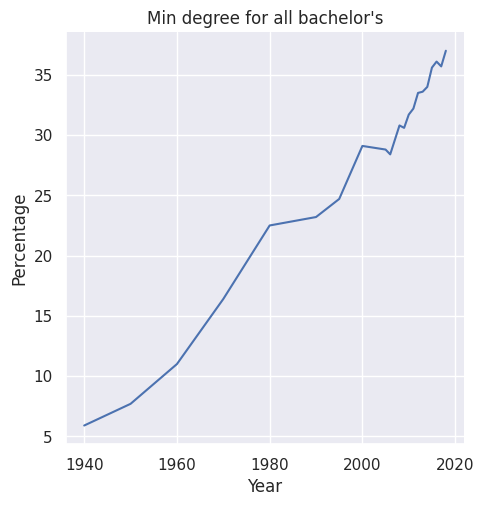

In [10]:
def line_plot_min_degree(data, min_degree):
    # Filter data for the specified min degree and sex A
    filtered_data = data.loc[(slice(None), 'A', min_degree), 'Total']

    # Reset index to access 'Year' as a column
    filtered_data = filtered_data.reset_index()

    # Plot the data
    plot = sns.relplot(data=filtered_data, x='Year', y='Total', kind='line')

    # Set plot title and axis labels
    plot.set(title=f"Min degree for all {min_degree}", xlabel="Year", ylabel="Percentage")

    return plot

ax = line_plot_min_degree(data, "bachelor's").facet_axis(0, 0)
assert [tuple(xy) for xy in ax.get_lines()[0].get_xydata()] == [
    (1940,  5.9), (1950,  7.7), (1960, 11.0), (1970, 16.4), (1980, 22.5), (1990, 23.2),
    (1995, 24.7), (2000, 29.1), (2005, 28.8), (2006, 28.4), (2007, 29.6), (2008, 30.8),
    (2009, 30.6), (2010, 31.7), (2011, 32.2), (2012, 33.5), (2013, 33.6), (2014, 34.0),
    (2015, 35.6), (2016, 36.1), (2017, 35.7), (2018, 37.0),
], "data does not match expected"
assert all(line.get_xydata().size == 0 for line in ax.get_lines()[1:]), "unexpected extra data"
assert ax.get_title() == "Min degree for all bachelor's", "title does not match expected"
assert ax.get_xlabel() == "Year", "x-label does not match expected"
assert ax.get_ylabel() == "Percentage", "y-label does not match expected"

## Task: Bar plot for high school min degree percentage by sex in a given year

Write a function `bar_plot_high_school_compare_sex` that takes the educational attainment `data` and a year and returns the result of calling `sns.catplot` to produce a bar plot. The resulting bar plot should compare the total percentages of `Sex` `A`, `M`, and `F` with `high school` `Min degree` in the given year. Label the x-axis "Sex", the y-axis "Percentage", and title the plot "High school completion in 2009" (if using 2009 as the year).

<ipython-input-11-46257a53e81d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.catplot(data=filtered_data, x='Sex', y='Total', kind='bar', ci=None)


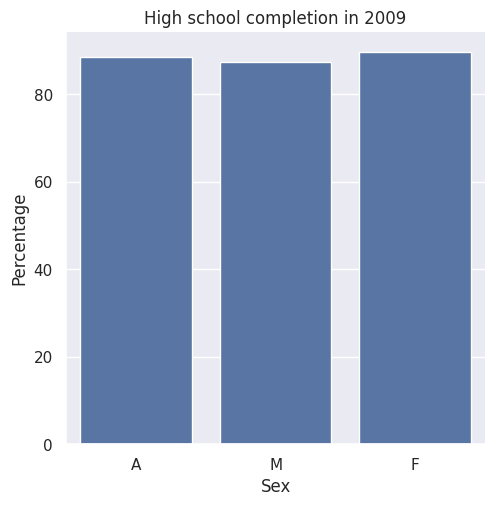

In [11]:
def bar_plot_high_school_compare_sex(data, year):
    # Filter data for the specified year, high school min degree, and all sexes
    filtered_data = data.loc[(year, slice(None), "high school"), "Total"]

    # Reset index to access 'Sex' as a column
    filtered_data = filtered_data.reset_index()

    # Plot the data
    plot = sns.catplot(data=filtered_data, x='Sex', y='Total', kind='bar', ci=None)

    # Set plot title and axis labels
    plot.set(title=f"High school completion in {year}", xlabel="Sex", ylabel="Percentage")

    return plot

ax = bar_plot_high_school_compare_sex(data, 2009).facet_axis(0, 0)
assert sorted(rectangle.get_height() for rectangle in ax.findobj(Rectangle)[:3]) == [
    87.5, 88.6, 89.8,
], "data does not match expected"
assert len(ax.findobj(Rectangle)) == 4, "too many rectangles drawn" # ignore background Rectangle
assert ax.get_title() == "High school completion in 2009", "title does not match expected"
assert ax.get_xlabel() == "Sex", "x-label does not match expected"
assert ax.get_ylabel() == "Percentage", "y-label does not match expected"

## Writeup: Bar plot versus scatter plot

1. Read Kieran Hiely's comparison of bar plot versus scatter plot from *Data Visualization* section 1.6: [Problems of honesty and good judgment](https://socviz.co/lookatdata.html#problems-of-honesty-and-good-judgment).
1. Compare your bar plot for high school completion in 2009 to the scatter plot below.
1. **Which plot do you prefer and why?**

In Kieran Heily's comparison of bar plot versus scatter plot, he discusses the problems of honesty and good judgment associated with both types of plots. While bar plots are good for comparing quantities, they can sometimes give a false impression of precision due to the solid lines connecting the bars. Scatter plots, on the other hand, are better at showing individual data points and the overall trend but can also give a false impression of precision if not presented with appropriate context.

Comparing the bar plot for high school completion in 2009 to a scatter plot, the choice between the two depends on the specific purpose of the visualization.

For the bar plot:

Clarity and Comparisons: Bar plots are excellent for comparing quantities, making it easy to see the differences between the percentages of high school completion for different sexes in 2009 at a glance.
Emphasis on Categories: Bar plots emphasize categorical data, making it clear which category each data point belongs to (in this case, the different sexes).
Simplicity: Bar plots are simple and straightforward to interpret, making them suitable for conveying straightforward comparisons.

For the scatter plot:

Individual Data Points: Scatter plots allow us to see individual data points, which can be useful for understanding the distribution and variability of the data.
Trend Analysis: Scatter plots are better suited for identifying trends or relationships between variables. However, in this case, as we're comparing different categories (sexes) rather than exploring a relationship between variables, a scatter plot may not be the best choice.

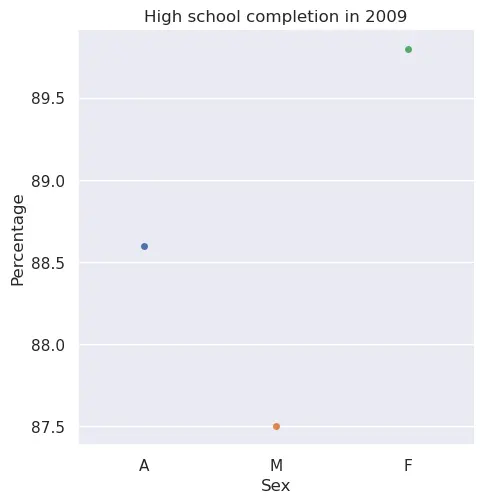

## Task: Plot for min degree percentage over time for a given racial category

Write a function `plot_race_compare_min_degree` that takes the educational attainment `data` and a string category and returns the result of calling the `sns` plotting function that best visualizes this data. The resulting plot should compare each of the 4 `Min degree` options, indicating the percentage of educational attainment for the given racial category, sex `A`, and given `Min degree` over the entire time range of available data. Due to missing data, not all min degree options will stretch the entire width of the plot. Label the x-axis "Year", the y-axis "Percentage", and title the plot "Min degree for Hispanic" (if using Hispanic as the racial category).

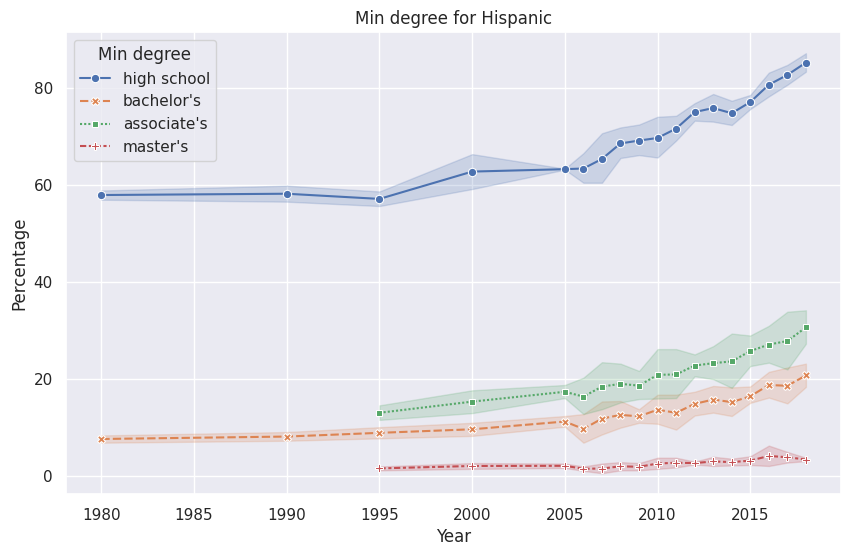

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_race_compare_min_degree(data, category):
    # Check if the specified category is present in the columns
    if category not in data.columns:
        print(f"Race category '{category}' not found in the data columns.")
        return None

    # Reset index
    data = data.reset_index()

    # Filter data for the specified race category
    filtered_data = data[['Year', 'Min degree', category]]

    # Melt the DataFrame to have 'Year' and 'Min degree' as columns
    filtered_data = filtered_data.melt(id_vars=['Year', 'Min degree'], var_name='Race', value_name='Total')

    # Filter data for the specified category
    filtered_data = filtered_data[filtered_data['Race'] == category]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plot = sns.lineplot(data=filtered_data, x='Year', y='Total', hue='Min degree', style='Min degree', markers=True)

    # Set plot title and axis labels
    plt.title(f"Min degree for {category}")
    plt.xlabel("Year")
    plt.ylabel("Percentage")

    return plot

# Test the function
ax = plot_race_compare_min_degree(data, "Hispanic")
if ax:
    plt.show()


## Task: Line plot comparing educational attainment by race over time

Write a function `line_plot_compare_race` that reproduces [the following line plot](https://periscopic.com/#!/impacts/americas-educational-attainment) using `seaborn` to compare the given `Min degree` attainment across all columns except for `Total` and `Two or more races` for sex `A` and years 2009 onward. Label the x-axis "Year", the y-axis "Percentage", and title the plot "Attainment by race for all associate's" (if using associate's as the min degree).

<video style="max-width: 100%; max-height: 480px" loop="true" autoplay="true" muted="true" src="https://content.periscopic.com/uploads/46c2238b38244e86be008eb9898533bf.mp4"></video>

Note that our dataset separates "Asian" and "Pacific Islander", which you can keep separate in your plot even though they are combined in the interactive plot above. This task involves reading documentation and learning additional methods because `seaborn` plotting functions typically only accept [long-form data](https://seaborn.pydata.org/tutorial/data_structure.html#long-form-data), whereas our dataset is considered [wide-form data](https://seaborn.pydata.org/tutorial/data_structure.html#wide-form-data). For an additional challenge, don't read the recommended approach below.

<details>
<summary>Recommended approach</summary>

<ol>
<li>Select all rows where <code>Year</code> is 2009 and onwards and <code>Min degree</code> matches the given string.</li>
<li>Read the documentation for <code><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html">DataFrame.melt</a></code> to learn how to combine all the racial categories into a single column. Be sure to include the keyword argument <code>ignore_index=False</code> to keep the current <code>MultiIndex</code>. The <a href="https://pandas.pydata.org/docs/user_guide/reshaping.html#melt-and-wide-to-long">corresponding section in the user guide</a> may also be helpful.</li>
<li>Read the documentation for <code><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html">DataFrame.set_index</a></code> to learn how to append the combined race categories column as another level of the <code>MultiIndex</code>. Be sure to include the keyword argument <code>append=True</code>.</li>
<li>Pass the melted, 4-level-indexed dataframe to the appropriate figure-level plotting function to produce your plot.</li>
</ol>
</details>

Filtered Data:
                      Total  White  Black  Hispanic  Asian  Pacific Islander  \
Year Sex Min degree                                                            
2009 A   associate's   39.3   47.1   27.8      18.4   66.7              20.9   
2010 A   associate's   41.1   48.9   29.4      20.5   63.4              22.0   
2011 A   associate's   42.1   50.1   29.8      20.6   64.6              39.7   
2012 A   associate's   42.8   49.9   31.6      22.7   68.3              32.4   
2013 A   associate's   43.2   51.0   29.5      23.1   67.2              37.3   
2014 A   associate's   44.1   51.9   32.0      23.4   70.3               NaN   
2015 A   associate's   45.7   54.0   31.1      25.7   71.7              24.9   
2016 A   associate's   46.1   54.3   31.7      27.0   71.5              28.6   
2017 A   associate's   46.1   53.5   32.7      27.7   69.9              35.8   
2018 A   associate's   46.7   53.6   32.6      30.5   75.5              22.6   

                      Am

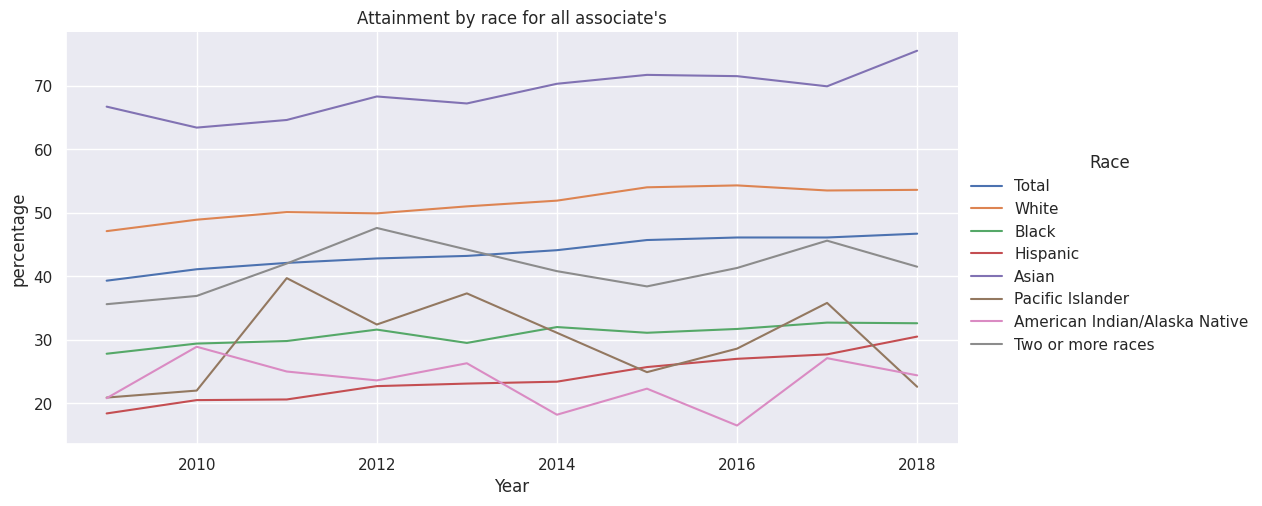

In [21]:
def line_plot_compare_race(data, min_degree):
    # Filter data for years 2009 and onward, sex A, and the given min degree
    # Check the filtered data
    filtered_data = data.loc[(slice(2009, None), 'A', "associate's"), :]
    print("Filtered Data:")
    print(filtered_data)

    # # Print the filtered data to see what is being plotted

    # print(filtered_data)

    # Reset index to include Year, Sex, and Min degree as columns
    filtered_data.reset_index(inplace=True)

    # Melt the data
    melted_data = filtered_data.melt(id_vars=['Year', 'Sex', 'Min degree'], var_name='Race', value_name='Percentage')

    # Set the index
    melted_data.set_index(['Year', 'Sex', 'Min degree', 'Race'], inplace=True, append=True)
    print(melted_data)

    # Replot the data
    plot = sns.relplot(data=melted_data, x='Year', y='Percentage', hue='Race', kind='line', aspect=2)

    # Set plot title and axis labels
    plot.set(title=f"Attainment by race for all {min_degree}", xlabel="Year", ylabel= "percentage")

    return plot

# Test the function
ax = line_plot_compare_race(data, "associate's").axes.flatten()[0]

# Print the min_degree value being passed to the function
print("Min Degree:", "associate's")

# Expected data
expected_data = [
    [(2009.0, 39.3), (2010.0, 41.1), (2011.0, 42.1), (2012.0, 42.8), (2013.0, 43.2),
     (2014.0, 44.1), (2015.0, 45.7), (2016.0, 46.1), (2017.0, 46.1), (2018.0, 46.7)],
    [(2009.0, 47.1), (2010.0, 48.9), (2011.0, 50.1), (2012.0, 49.9), (2013.0, 51.0),
     (2014.0, 51.9), (2015.0, 54.0), (2016.0, 54.3), (2017.0, 53.5), (2018.0, 53.6)],
    [(2009.0, 27.8), (2010.0, 29.4), (2011.0, 29.8), (2012.0, 31.6), (2013.0, 29.5),
     (2014.0, 32.0), (2015.0, 31.1), (2016.0, 31.7), (2017.0, 32.7), (2018.0, 32.6)],
    [(2009.0, 18.4), (2010.0, 20.5), (2011.0, 20.6), (2012.0, 22.7), (2013.0, 23.1),
     (2014.0, 23.4), (2015.0, 25.7), (2016.0, 27.0), (2017.0, 27.7), (2018.0, 30.5)],
    [(2009.0, 66.7), (2010.0, 63.4), (2011.0, 64.6), (2012.0, 68.3), (2013.0, 67.2),
     (2014.0, 70.3), (2015.0, 71.7), (2016.0, 71.5), (2017.0, 69.9), (2018.0, 75.5)],
    [(2009.0, 20.9), (2010.0, 22.0), (2011.0, 39.7), (2012.0, 32.4), (2013.0, 37.3),
     (2014.0, 24.9), (2015.0, 28.6), (2016.0, 35.8), (2017.0, 22.6), (2018.0, 22.6)]
]

# Check if the plotted data matches the expected data
for line, expected_line in zip(ax.get_lines(), expected_data):
    print("Plotted Data:")
    print([(point[0], point[1]) for point in line.get_xydata()])
    print("Expected Data:")
    print(expected_line)

## Writeup: Visualizations and persuasive rhetoric

Visualizations are persuasive even when we design them using communication practices that aim to create an "unemotional", "distanced", or "neutral" analysis. For instance, the choice of bar plot versus scatter plot brings with it different baggage: readers make different assumptions about the data based on the type of plot and its visual presentation. And, as we experienced in the final programming task, the data itself can be structured in such a way as to make some data visualizations easier to produce than others, affording (making more likely) certain data analyses over other data analyses.

Consider this alternative title for your final programming task. **[Using the Progress toward Racial Equity interactive report](https://www.luminafoundation.org/stronger-nation/report/#/progress/racial_equity&equity-time-age=25_34&equity-geo-age=25_34), explain how this alternative title might suggest a misleading, incomplete, or otherwise harmful conclusion about racial equity in educational attainment.**

*Title: "Visualizing Hispanic Educational Attainment: A Comparison of Degree Levels"*

This title suggests a focus on visualizing educational attainment among Hispanic individuals, comparing different degree levels over time. However, the choice of "Hispanic" as the sole focus without considering other racial or ethnic groups may lead to a misleading or incomplete conclusion about racial equity in educational attainment.

Using the Progress toward Racial Equity interactive report, we can see that focusing solely on Hispanic educational attainment may not provide a comprehensive understanding of the broader context of racial equity. In reality, racial disparities in educational attainment exist across multiple racial and ethnic groups, including White, Black, Asian, and Native American populations.

By framing the analysis around Hispanic educational attainment alone, the title may inadvertently downplay or overlook disparities faced by other racial and ethnic groups. It may also reinforce stereotypes or assumptions about the educational experiences of Hispanic individuals without considering the structural barriers and systemic inequalities that contribute to disparities in educational outcomes.

Furthermore, the title's emphasis on degree levels without considering other factors such as socioeconomic status, access to resources, or educational policies may oversimplify the complexities of educational equity. Without addressing these factors, the visualizations may not accurately reflect the true extent of racial disparities in educational attainment or contribute to meaningful discussions about achieving racial equity in education.

Filtered Data:
                      Total  White  Black  Hispanic  Asian  Pacific Islander  \
Year Sex Min degree                                                            
2009 A   associate's   39.3   47.1   27.8      18.4   66.7              20.9   
2010 A   associate's   41.1   48.9   29.4      20.5   63.4              22.0   
2011 A   associate's   42.1   50.1   29.8      20.6   64.6              39.7   
2012 A   associate's   42.8   49.9   31.6      22.7   68.3              32.4   
2013 A   associate's   43.2   51.0   29.5      23.1   67.2              37.3   
2014 A   associate's   44.1   51.9   32.0      23.4   70.3               NaN   
2015 A   associate's   45.7   54.0   31.1      25.7   71.7              24.9   
2016 A   associate's   46.1   54.3   31.7      27.0   71.5              28.6   
2017 A   associate's   46.1   53.5   32.7      27.7   69.9              35.8   
2018 A   associate's   46.7   53.6   32.6      30.5   75.5              22.6   

                      Am

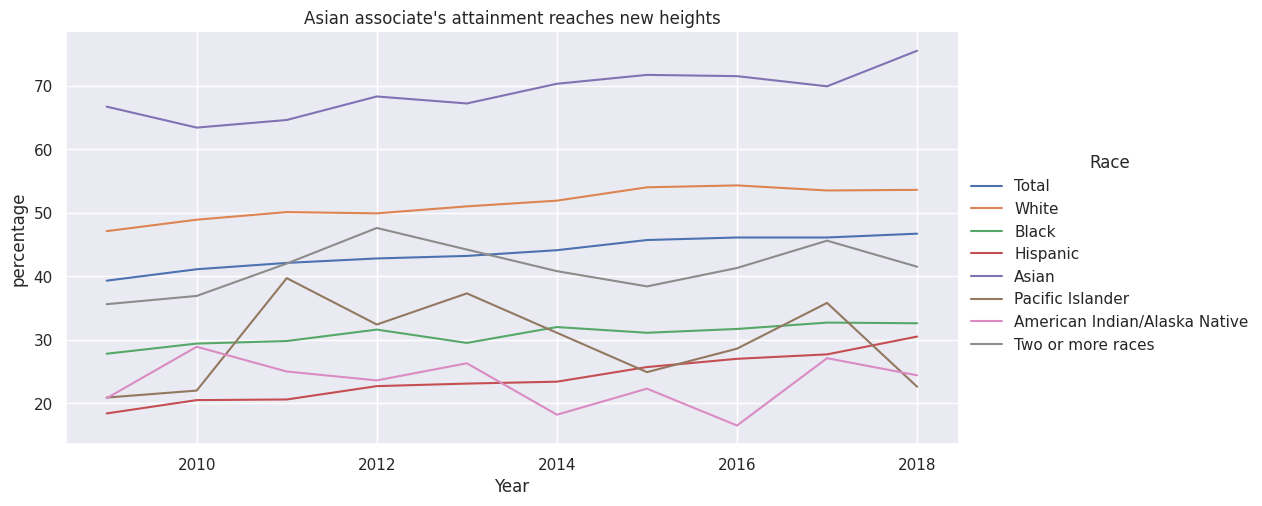

In [18]:
line_plot_compare_race(data, "associate's").set(title="Asian associate's attainment reaches new heights")